In [1]:
# from transformers import DistilBertTokenizer, DistilBertModel
from sentence_transformers import SentenceTransformer
import torch
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.decomposition import PCA


c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Example list of news articles
df = pd.read_csv("dataset8.csv", on_bad_lines='skip')
df

,link,title,health_annotation,content,cluster,x,y,annotation
0,https://www.webmd.com/diabetes/news/20250220/f...,FDA OKs First Fast-Acting Insulin Biosimilar f...,1,"Feb. 20, 2025 -- The FDA has approved a new fa...",2,-0.002860,0.356773,1
1,https://www.webmd.com/heart-disease/news/20250...,Many Athletes With Heart Issues May Be Able to...,1,"Feb. 20, 2025 – Athletes with certain heart co...",0,0.093869,0.100473,1
2,https://www.webmd.com/a-to-z-guides/news/20250...,‘Dangerous’ Hospital Bed Shortages on Horizon:...,1,"Feb. 19, 2025 — U.S. hospitals could see a “da...",2,-0.094817,-0.067722,1
3,https://www.webmd.com/vaccines/news/20250219/n...,New Studies Show RSV Vaccine Is Safe During Pr...,1,"Feb. 19, 2025 – A vaccine for pregnant women t...",1,-0.321384,0.070975,1
4,https://www.webmd.com/pain-management/news/202...,FDA Approves New Drug for Rare Joint Tumor,1,"Feb. 18, 2025 — The FDA has approved vimseltin...",2,-0.099812,0.145532,1
...,...,...,...,...,...,...,...,...
6777,https://healthimpactnews.com/2022/big-tech-cra...,"Big Tech Crash 2022: Amazon Fires 10,000 Emplo...",1,"by ZeroHedge News Over the past month, technol...",4,-0.069502,0.258177,0
6778,https://healthimpactnews.com/2022/the-u-s-medi...,The U.S. Medical System is Collapsing after Ma...,1,"by Brian Shilhavy Editor, Health Impact News I...",0,-0.381743,-0.101672,0
6779,https://healthimpactnews.com/2022/the-religion...,"The Religion of the Technocrats is Failing, as...",1,"by Brian Shilhavy Editor, Health Impact News W...",4,-0.189172,0.078754,0
6780,https://healthimpactnews.com/2022/sam-bankman-...,Sam Bankman-Fried Bought Into Stakeholder Capi...,1,"Tony Blair, Bill Clinton and Sam Bankman-Fried...",4,-0.045095,0.378596,0


In [3]:
df = df.dropna(subset=['content']).reset_index(drop=True)  # Critical: reset_index
# df = df[df['annotation'] == 0].reset_index(drop=True)
texts = df['content'].tolist()  # Now texts and df have identical length
print(len(texts))

6782


In [4]:
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(texts, show_progress_bar=True)

Batches: 100%|██████████| 212/212 [12:16<00:00,  3.48s/it]


In [5]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(embeddings)

KMeans(n_clusters=5, random_state=42)

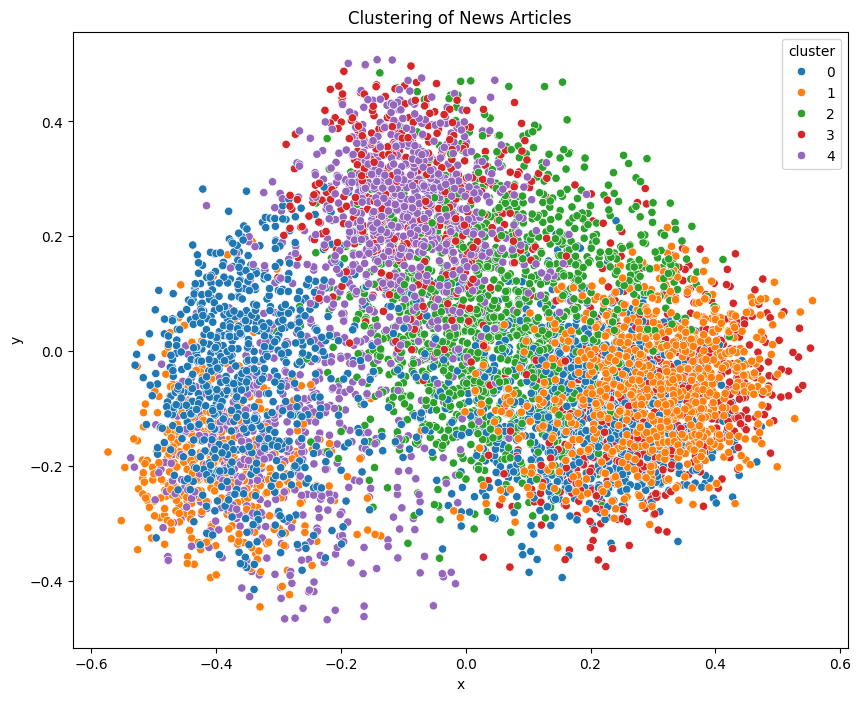

In [6]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
df['x'] = reduced_embeddings[:, 0]
df['y'] = reduced_embeddings[:, 1]
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='x', y='y', hue='cluster', palette='tab10')
plt.title("Clustering of News Articles")
plt.show()

In [7]:
# embeddings
print(len(embeddings))

6782


In [8]:
# Cluster
embeddings = np.array(embeddings)
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# Map results
# for text, label in zip(df, clusters):
#     print(f"[Cluster {label}] {text}")


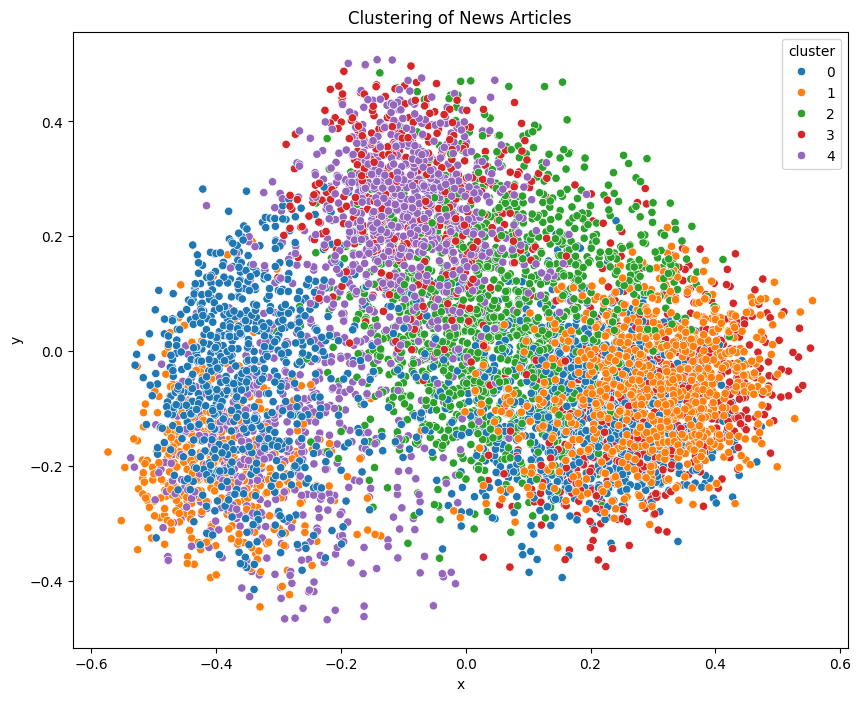

In [9]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
df['x'] = reduced_embeddings[:, 0]
df['y'] = reduced_embeddings[:, 1]
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='x', y='y', hue='cluster', palette='tab10')
plt.title("Clustering of News Articles")
plt.show()

In [10]:
# kmeans = KMeans(n_clusters=10, random_state=42)
# kmeans.fit(embeddings)
# df['cluster'] = kmeans.labels_  # Works now!

Cluster annotation distribution:
Cluster 0: Total=1726, Annotation 0=714, Annotation 1=1012
Cluster 1: Total=1196, Annotation 0=768, Annotation 1=428
Cluster 2: Total=1488, Annotation 0=522, Annotation 1=966
Cluster 3: Total=1001, Annotation 0=402, Annotation 1=599
Cluster 4: Total=1371, Annotation 0=729, Annotation 1=642


C:\Users\agaro\AppData\Local\Temp\ipykernel_25420\2422166650.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=cluster_labels, y=[0]*len(cluster_labels), jitter=0.25, palette="deep")


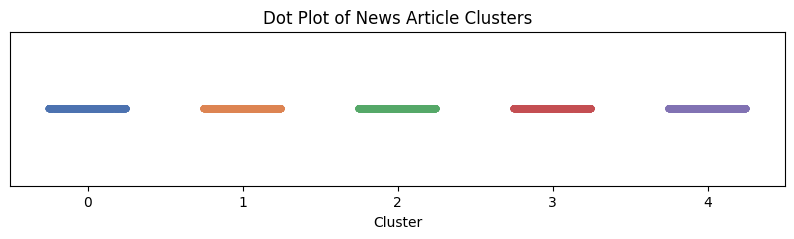


🔹 Cluster 0 examples:
• Feb. 20, 2025 -- The FDA has approved a new fast-acting insulin biosimilar to help manage blood suga...
• Feb. 19, 2025 — U.S. hospitals could see a “dangerous” shortage of beds in the not-so-distant future...
• Feb. 18, 2025 — The FDA has approved vimseltinib, a new oral drug for a rare, noncancerous tumor of ...
• Feb. 13, 2025 – For years, some people taking the drug semaglutide to treat diabetes or obesity have...
• Feb. 13, 2025 -- The FDA has approved a new three-drug combination to treat certain types of an aggr...
• Feb. 12, 2025 – The FDA has approved a new pill for a rare genetic disorder called neurofibromatosis...
• Feb. 12, 2024 – People with type 2 diabetes taking GLP-1 medicines may experience potentially blindi...
• Feb. 10, 2025 -- The FDA has approved a new antibiotic combination called Emblaveo to treat serious ...
• Feb. 6, 2025 — People who get hospital-based care for cannabis use disorder have a 2.8-fold greater ...
• Feb. 6, 2025 – Foreve

In [11]:
# Count articles in each cluster
from collections import Counter
cluster_counts = Counter(cluster_labels)

from collections import defaultdict

# Dictionary of the form: {cluster_id: {0: count0, 1: count1}}
annotation_counts = defaultdict(lambda: {0: 0, 1: 0})

# Populate counts
for cluster_id, annotation in zip(df['cluster'], df['annotation']):
    annotation_counts[cluster_id][annotation] += 1

# Print detailed cluster annotation counts
print("Cluster annotation distribution:")
for cluster_id in sorted(annotation_counts.keys()):
    count_0 = annotation_counts[cluster_id][0]
    count_1 = annotation_counts[cluster_id][1]
    total = count_0 + count_1
    print(f"Cluster {cluster_id}: Total={total}, Annotation 0={count_0}, Annotation 1={count_1}")


# 📊 Dot plot (strip style)
plt.figure(figsize=(10, 2))
sns.stripplot(x=cluster_labels, y=[0]*len(cluster_labels), jitter=0.25, palette="deep")
plt.xlabel("Cluster")
plt.title("Dot Plot of News Article Clusters")
plt.yticks([])
plt.show()

# 📌 Get example articles from each cluster
samples_per_cluster = 10
cluster_examples = {i: [] for i in range(5)}

for i, (text, label) in enumerate(zip(texts, cluster_labels)):
    if len(cluster_examples[label]) < samples_per_cluster:
        cluster_examples[label].append(text)

# Display samples
for cluster_id, examples in cluster_examples.items():
    print(f"\n🔹 Cluster {cluster_id} examples:")
    for example in examples:
        print(f"• {example[:100]}...")  # Print first 100 chars

In [13]:
df['super_cluster'] = cluster_labels
# Save to CSV
df.to_csv('clustered_super.csv', index=False)


In [14]:
from transformers import DistilBertTokenizer
from transformers import AutoTokenizer
from collections import Counter

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')


In [15]:
from collections import defaultdict

# Group texts by cluster
cluster_texts = defaultdict(list)
for text, cluster_id in zip(df['content'], df['cluster']):
    cluster_texts[cluster_id].append(text)


Token indices sequence length is longer than the specified maximum sequence length for this model (1453879 > 512). Running this sequence through the model will result in indexing errors



Top words for Cluster 2:
s: 1.0000
said: 0.8494
people: 0.6321
patient: 0.6123
food: 0.4477
one: 0.4440
use: 0.4159
may: 0.4052
drug: 0.3739
product: 0.3528
will: 0.3452
make: 0.3359
treatment: 0.3325
re: 0.3047
time: 0.2985
year: 0.2952
new: 0.2798
risk: 0.2725
need: 0.2662
found: 0.2524
used: 0.2493
study: 0.2489
many: 0.2442
cancer: 0.2440
don t: 0.2402
even: 0.2367
doctor: 0.2315
help: 0.2246
medication: 0.2177
according: 0.2160
now: 0.2151
u: 0.2042
take: 0.2002
children: 0.1997
health: 0.1986
ingredient: 0.1928
research: 0.1924
first: 0.1915
say: 0.1908
well: 0.1866
often: 0.1824
g: 0.1808
u s: 0.1768
men: 0.1759
work: 0.1755
including: 0.1715
know: 0.1699
way: 0.1693
made: 0.1684
disease: 0.1673


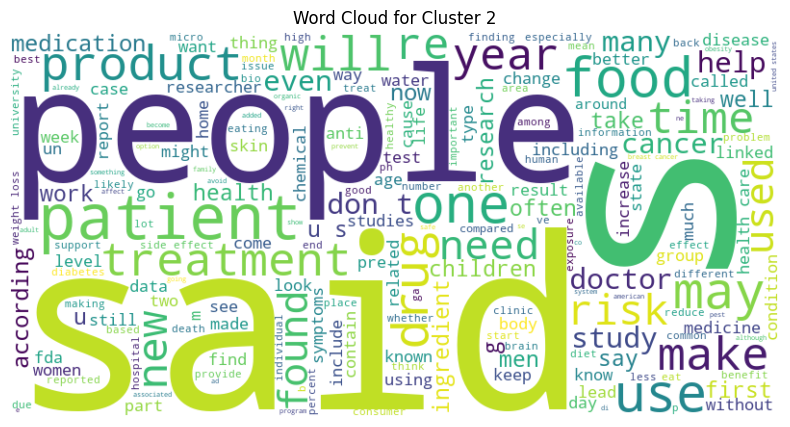


Top words for Cluster 0:
s: 1.0000
people: 0.9425
said: 0.7267
vaccine: 0.6149
one: 0.6110
may: 0.5739
time: 0.5349
re: 0.4177
help: 0.3962
exercise: 0.3962
cause: 0.3806
will: 0.3799
new: 0.3769
doctor: 0.3735
symptoms: 0.3567
patient: 0.3560
even: 0.3518
risk: 0.3426
make: 0.3308
co vaccine: 0.3256
day: 0.3175
say: 0.3152
don t: 0.3140
many: 0.3066
use: 0.2950
take: 0.2881
pain: 0.2809
need: 0.2752
brain: 0.2691
study: 0.2686
now: 0.2659
according: 0.2659
co: 0.2651
year: 0.2607
body: 0.2552
work: 0.2508
case: 0.2491
treatment: 0.2476
sleep: 0.2454
often: 0.2441
well: 0.2409
u s: 0.2385
back: 0.2362
way: 0.2274
children: 0.2264
va: 0.2217
called: 0.2175
see: 0.2113
including: 0.2108
death: 0.2086


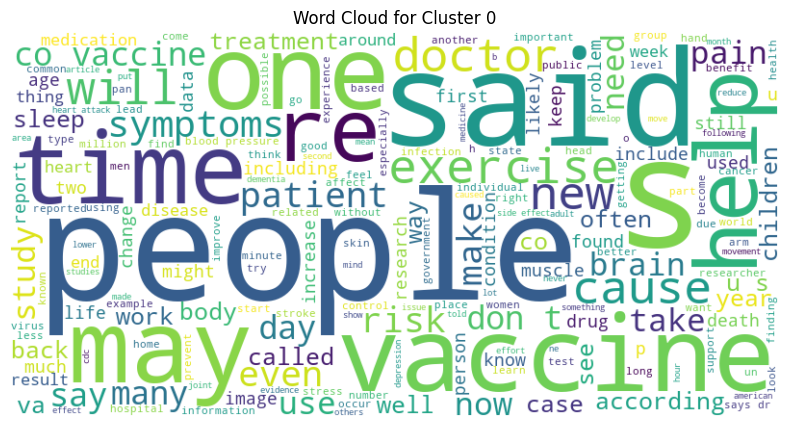


Top words for Cluster 1:
s: 1.0000
vaccine: 0.7974
people: 0.7000
body: 0.6925
one: 0.6448
food: 0.6154
said: 0.5920
help: 0.5626
may: 0.5399
cause: 0.5173
risk: 0.5141
number: 0.5141
make: 0.4926
re: 0.4807
found: 0.4656
blood pressure: 0.4644
time: 0.4124
use: 0.4076
will: 0.3854
even: 0.3667
co: 0.3611
diet: 0.3556
contain: 0.3421
increase: 0.3317
skin: 0.3313
vitamin d: 0.3302
symptoms: 0.3226
day: 0.3170
study: 0.3151
need: 0.3107
health: 0.2988
lead: 0.2976
blood sugar: 0.2936
va: 0.2928
benefit: 0.2924
according: 0.2920
nutrient: 0.2892
percent: 0.2773
fruit: 0.2757
anti: 0.2753
brain: 0.2749
inflammation: 0.2745
new: 0.2725
many: 0.2698
used: 0.2678
year: 0.2646
take: 0.2646
well: 0.2642
result: 0.2634
reduce: 0.2539


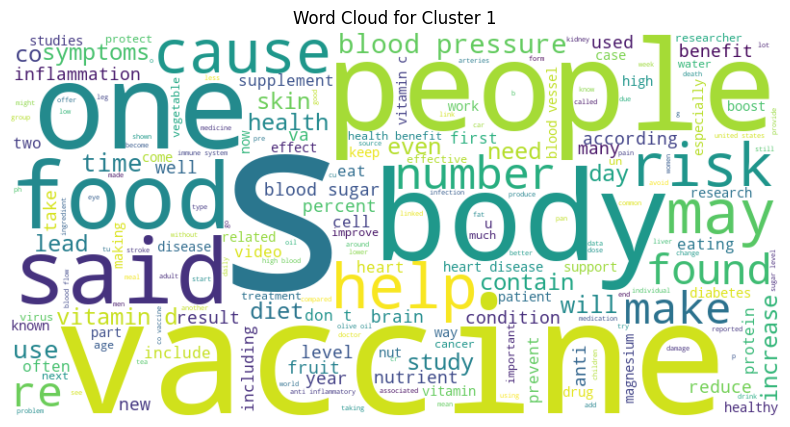


Top words for Cluster 3:
s: 1.0000
people: 0.8220
said: 0.6109
one: 0.5810
food: 0.4679
children: 0.4560
may: 0.4224
will: 0.3415
diet: 0.3398
time: 0.3184
many: 0.3017
risk: 0.2973
state: 0.2759
patient: 0.2725
new: 0.2715
health: 0.2712
even: 0.2610
year: 0.2474
day: 0.2402
found: 0.2399
re: 0.2351
women: 0.2338
help: 0.2328
case: 0.2328
make: 0.2232
say: 0.2226
study: 0.2222
much: 0.2219
according: 0.2198
doctor: 0.2178
now: 0.2175
need: 0.2151
including: 0.2127
eat: 0.2124
way: 0.2059
use: 0.2029
parent: 0.2001
life: 0.1991
u s: 0.1971
don t: 0.1957
body: 0.1950
well: 0.1896
take: 0.1879
eating: 0.1876
see: 0.1872
diabetes: 0.1865
u: 0.1842
obesity: 0.1831
two: 0.1801
b: 0.1696


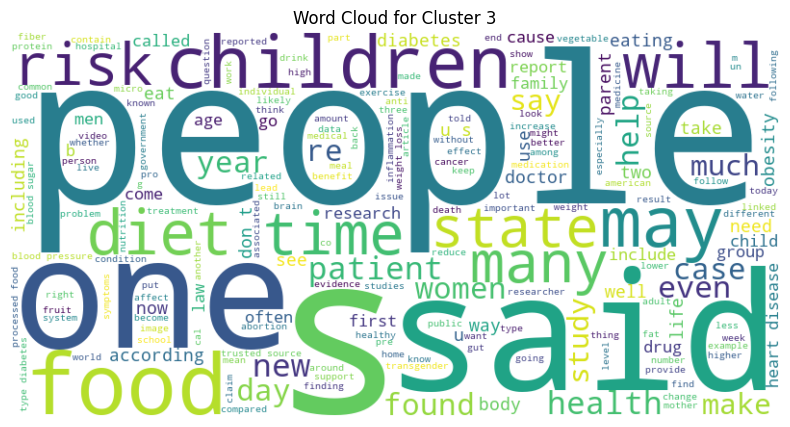


Top words for Cluster 4:
said: 1.0000
s: 0.9682
people: 0.7866
one: 0.7620
will: 0.7600
u s: 0.6497
new: 0.5470
now: 0.5320
u: 0.4624
time: 0.4416
world: 0.3924
co: 0.3881
year: 0.3597
even: 0.3492
many: 0.3468
may: 0.3221
god: 0.3179
source: 0.3154
israel: 0.3141
see: 0.3058
day: 0.3002
case: 0.2975
say: 0.2960
according: 0.2926
re: 0.2756
virus: 0.2559
well: 0.2541
first: 0.2526
way: 0.2519
american: 0.2506
today: 0.2494
know: 0.2461
come: 0.2385
state: 0.2380
including: 0.2282
united states: 0.2266
still: 0.2242
use: 0.2237
used: 0.2233
un: 0.2228
children: 0.2174
government: 0.2152
trump: 0.2098
reported: 0.2083
make: 0.2072
made: 0.2072
going: 0.2056
two: 0.2013
called: 0.1993
much: 0.1971


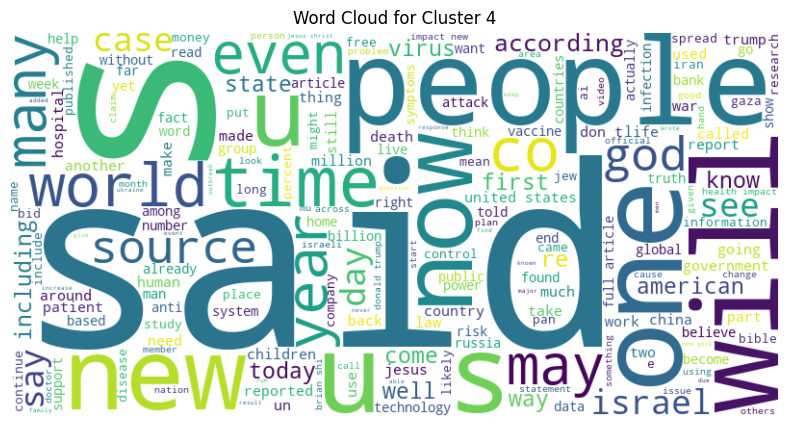

In [16]:
from wordcloud import WordCloud

# Tokenize and count using transformer tokenizer
for cluster_id, texts in cluster_texts.items():
    all_text = " ".join(texts)
    tokens = tokenizer.tokenize(all_text)
    
    # Optional: remove special tokens like [CLS], [SEP], ##subwords
    cleaned_tokens = [t for t in tokens if not t.startswith('##') and t.isalpha()]

    counts = Counter(cleaned_tokens)

    # print(f"\n[DistilBERT Tokenizer] Top words for Cluster {cluster_id}:")
    # for word, freq in counts.most_common(20):
    #     print(f"{word}: {freq}")

    # Optionally generate a word cloud from cleaned tokens (join into string)
    wordcloud_input = " ".join(cleaned_tokens)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(wordcloud_input)

    top_words = wordcloud.words_

    # Print top 20 words and weights
    print(f"\nTop words for Cluster {cluster_id}:")
    for word, score in list(top_words.items())[:50]:
        print(f"{word}: {score:.4f}")

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Cluster {cluster_id}")
    plt.show()
